# Einrichten & Datenimport

In [74]:
import pandas as pd
import plotly.express as px
import numpy as np
import math

In [75]:
df = pd.read_csv("../data/data.csv")

# Daten aufbereiten

Alle Einträge ohne Tracking-Daten können nicht richtig ausgewertet werden. Deshalb werden sie entfernt.

In [76]:
# Entferne alle Einträge, die keine Tracking-Daten beinhalten
df = df.dropna(subset=["reading_duration", "reading_count", "questions_duration"])

In [77]:
# Millisekunden -> Sekunden
df["reading_duration"] = df.apply(lambda row: row["reading_duration"] / 1000, axis=1)
df["questions_duration"] = df.apply(lambda row: float(row["questions_duration"]) / 1000, axis=1)

Für die Antworten für die Fragebögen (Bionic Reading und persönliche Fragen) sind nur als Index gespeichert. Sie müssen noch umgewandelt werden.

In [78]:
def index_to_label(col, label):
    df[col] = df[col].map(lambda i: "" if math.isnan(i) else label[int(i)])

In [79]:
bionic_schneller_labels = ["Deutlich schneller", "Schneller", "Kein Unterschied", "Langsamer", "Deutlich langsamer"]
index_to_label("bionic_schneller", bionic_schneller_labels)

In [80]:
bionic_leichter_labels = ["Deutlich leichter", "Leichter", "Kein Unterschied", "Schwerer", "Deutlich schwerer"]
index_to_label("bionic_leichter", bionic_leichter_labels)

In [81]:
bionic_textverstaendnis_labels = ["Überhaupt nicht", "Ein wenig", "Viel", "Sehr viel"]
index_to_label("bionic_textverstaendnis", bionic_textverstaendnis_labels)

In [82]:
bionic_woerter_finden_labels = ["Überhaupt nicht", "Ein wenig", "Viel", "Sehr viel"]
index_to_label("bionic_woerter_finden", bionic_woerter_finden_labels)

In [83]:
bionic_mehr_texte_labels = ["Ja", "Nein"]
index_to_label("bionic_mehr_texte", bionic_mehr_texte_labels)

In [84]:
bionic_in_schule_labels = ["Ja", "Nein"]
index_to_label("bionic_in_schule", bionic_in_schule_labels)

In [85]:
persoenlich_textverstaendnis_labels = ["Leicht", "Eher leicht", "Ok", "Eher schwer", "Schwer"]
index_to_label("persoenlich_textverstaendnis", persoenlich_textverstaendnis_labels)

In [86]:
persoenlich_freude_lesen_labels = ["Nicht sehr gerne", "Nicht gerne", "Neutral", "Gerne", "Sehr gerne"]
index_to_label("persoenlich_freude_lesen", persoenlich_freude_lesen_labels)

In [87]:
persoenlich_haeufigkeit_lesen_labels = ["Nicht sehr oft", "Nicht oft", "Gelegentlich", "Oft", "Sehr oft"]
index_to_label("persoenlich_haeufigkeit_lesen", persoenlich_haeufigkeit_lesen_labels)

In [88]:
persoenlich_ziel_lesen_labels = ["Nein", "Ich will mehr lesen", "Ich will weniger lesen"]
index_to_label("persoenlich_ziel_lesen", persoenlich_ziel_lesen_labels)

In [89]:
df.reading_count = df.reading_count.astype(int)

In [90]:
altersgruppen_dict = {
    12.0: "12–13",
    13.0: "12–13",
    17.0: "17–19",
    18.0: "17–19",
    19.0: "17–19",
    21.0: "Keine Angabe", # Nicht genug Einträge
    np.nan: "Keine Angabe"
}

df["altersgruppe"] = df["persoenlich_alter"].map(altersgruppen_dict)

Alle Einträge, die mehrfach die gleiche ID verwenden:

In [91]:
duplicated_entries = df[df.duplicated("id", keep=False)]
duplicated_entries.sort_values(by="id")

,id,fingerprint,test,fragen_gefuehle_beruf,fragen_warum_lehrer,fragen_oeffentlichkeit_meinung,fragen_vorwurf_eltern,fragen_internet,bionic_schneller,bionic_leichter,...,bionic_anmerkungen,persoenlich_freude_lesen,persoenlich_haeufigkeit_lesen,persoenlich_ziel_lesen,persoenlich_textverstaendnis,persoenlich_alter,reading_count,reading_duration,questions_duration,altersgruppe
4,1c20b10b-7b40-4f72-ad62-d0f82dffe16c,3f9e59cdd2fbc071de73b4cf87d21eb8,True,1.0,0.0,2.0,1.0,0.0,Kein Unterschied,Kein Unterschied,...,NaN,Nicht sehr gerne,Nicht sehr oft,Nein,Eher leicht,18.0,2,190.115,76.773,17–19
5,1c20b10b-7b40-4f72-ad62-d0f82dffe16c,3f9e59cdd2fbc071de73b4cf87d21eb8,True,1.0,0.0,2.0,1.0,0.0,Kein Unterschied,Kein Unterschied,...,NaN,Nicht sehr gerne,Nicht sehr oft,Nein,Eher leicht,18.0,2,190.115,76.773,17–19
87,2eeeab3e-7ba6-4797-8ab5-a1f66651c17a,b8e5e010a46c8e7e722ec87c63c9e0cb,False,1.0,0.0,0.0,0.0,2.0,,,...,NaN,Neutral,Gelegentlich,Nein,Leicht,12.0,3,462.458,220.544,12–13
88,2eeeab3e-7ba6-4797-8ab5-a1f66651c17a,b8e5e010a46c8e7e722ec87c63c9e0cb,False,1.0,0.0,0.0,2.0,2.0,,,...,NaN,Neutral,Gelegentlich,Nein,Leicht,12.0,3,462.458,220.544,12–13
29,3a6de92b-d5ad-40d0-a13a-3138415bcbc1,74f83fe9fa01af473fd93a52407a5be9,True,1.0,0.0,2.0,1.0,0.0,Langsamer,Schwerer,...,"Ich hatte den Eindruck, dass ich dadurch, dass...",Gerne,Gelegentlich,Ich will mehr lesen,Ok,19.0,1,105.683,61.570,17–19
30,3a6de92b-d5ad-40d0-a13a-3138415bcbc1,74f83fe9fa01af473fd93a52407a5be9,True,1.0,0.0,2.0,1.0,0.0,Langsamer,Schwerer,...,"Ich hatte den Eindruck, dass ich dadurch, dass...",Gerne,Gelegentlich,Ich will mehr lesen,Ok,19.0,1,105.683,61.570,17–19
31,3a6de92b-d5ad-40d0-a13a-3138415bcbc1,74f83fe9fa01af473fd93a52407a5be9,True,1.0,0.0,2.0,1.0,0.0,Langsamer,Schwerer,...,"Ich hatte den Eindruck, dass ich dadurch, dass...",Gerne,Gelegentlich,Ich will mehr lesen,Ok,19.0,1,105.683,61.570,17–19
50,5a57eb63-7152-41ef-902d-8c2c1fba257b,b8e5e010a46c8e7e722ec87c63c9e0cb,False,1.0,0.0,3.0,1.0,0.0,,,...,NaN,Gerne,Gelegentlich,Nein,Ok,13.0,2,231.758,103.286,12–13
51,5a57eb63-7152-41ef-902d-8c2c1fba257b,b8e5e010a46c8e7e722ec87c63c9e0cb,False,1.0,0.0,3.0,1.0,0.0,,,...,NaN,Gerne,Gelegentlich,Nein,Ok,13.0,2,231.758,103.286,12–13
1,e43c464c-543d-4a31-bbc7-ddc59c97f4d6,f5129980f00eff8b06c6d9dc53152514,True,1.0,2.0,0.0,1.0,0.0,Schneller,Kein Unterschied,...,NaN,Neutral,Nicht oft,Ich will mehr lesen,Ok,18.0,1,177.276,105.965,17–19


Entferne alle doppelten Einträge und behalte nur den letzten (aktuellen) Eintrag.

In [92]:
df = df.drop_duplicates(subset="id", keep="last")

# Standardwerte

Wie `color_maps`

In [93]:
test_color_map = {True: "#00cc96", False: "#636efa", "true": "#00cc96", "false": "#636efa"}

In [94]:
age_array = df.dropna(subset="persoenlich_alter")["persoenlich_alter"].unique()
age_array.sort()

In [95]:
agegroup_array = df["altersgruppe"].unique()
agegroup_array.sort()

# Überblick

## Datenset

In [96]:
df

,id,fingerprint,test,fragen_gefuehle_beruf,fragen_warum_lehrer,fragen_oeffentlichkeit_meinung,fragen_vorwurf_eltern,fragen_internet,bionic_schneller,bionic_leichter,...,bionic_anmerkungen,persoenlich_freude_lesen,persoenlich_haeufigkeit_lesen,persoenlich_ziel_lesen,persoenlich_textverstaendnis,persoenlich_alter,reading_count,reading_duration,questions_duration,altersgruppe
0,3cc07733-3742-4090-994a-a5871016ebcc,d416268a243114c1742cc14e71814ade,True,1.0,0.0,2.0,1.0,0.0,Schneller,Leichter,...,NaN,Nicht sehr gerne,Nicht sehr oft,Nein,Eher schwer,18.0,1,128.633,31.664,17–19
2,e43c464c-543d-4a31-bbc7-ddc59c97f4d6,f5129980f00eff8b06c6d9dc53152514,True,1.0,2.0,0.0,1.0,0.0,Schneller,Kein Unterschied,...,NaN,Neutral,Nicht oft,Ich will mehr lesen,Ok,18.0,1,177.276,105.965,17–19
3,731e6143-04f3-4fff-a904-b86052d8686d,c1ed69d201693ed73e4c6c85f52e6a5c,True,2.0,0.0,0.0,1.0,0.0,Deutlich langsamer,Deutlich schwerer,...,NaN,Gerne,Nicht oft,Ich will mehr lesen,Eher schwer,18.0,2,249.590,107.136,17–19
5,1c20b10b-7b40-4f72-ad62-d0f82dffe16c,3f9e59cdd2fbc071de73b4cf87d21eb8,True,1.0,0.0,2.0,1.0,0.0,Kein Unterschied,Kein Unterschied,...,NaN,Nicht sehr gerne,Nicht sehr oft,Nein,Eher leicht,18.0,2,190.115,76.773,17–19
6,9060e823-c05e-41ae-9c36-10c77e389be7,5eeefb9a8a6e1cc2490146ff16de1554,True,2.0,0.0,0.0,3.0,0.0,Kein Unterschied,Schwerer,...,Ich hab das Interesse verloren und nicht weite...,Sehr gerne,Sehr oft,Nein,Leicht,18.0,1,158.973,80.649,17–19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,a795abf2-e090-4e30-81b0-11c59a9b0f15,4d2a8b455f5c6b13dcf035c264c57750,False,1.0,0.0,2.0,1.0,0.0,,,...,NaN,Neutral,Nicht oft,Ich will mehr lesen,Ok,18.0,2,126.802,97.451,17–19
86,5f4ce1fe-d77b-4c86-94a9-bc18d995315a,407571ec5f60b3d75cfc15ae6c1dba3b,False,1.0,1.0,3.0,3.0,1.0,,,...,NaN,Neutral,Nicht oft,Ich will mehr lesen,Ok,12.0,2,403.548,151.717,12–13
88,2eeeab3e-7ba6-4797-8ab5-a1f66651c17a,b8e5e010a46c8e7e722ec87c63c9e0cb,False,1.0,0.0,0.0,2.0,2.0,,,...,NaN,Neutral,Gelegentlich,Nein,Leicht,12.0,3,462.458,220.544,12–13
89,c8768c2c-4a8f-4a63-8d8a-2e3e1f783e60,65ed3127ab31470df0759fcc0c1c4a45,False,0.0,0.0,0.0,0.0,0.0,,,...,NaN,Nicht gerne,Gelegentlich,Nein,Ok,NaN,2,199.813,250.857,Keine Angabe


In [97]:
len(df)

69

## Test- & Kontrollgruppe

In [98]:
test_counts = df["test"].value_counts().reset_index().sort_values(by="test")
test_counts

,test,count
1,False,33
0,True,36


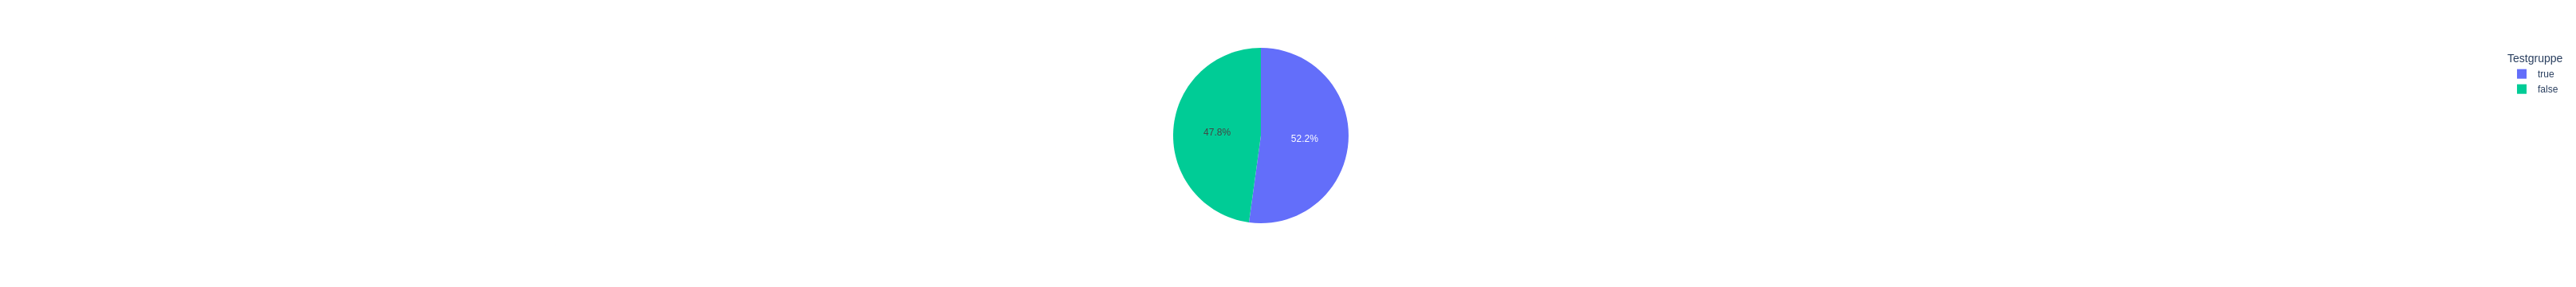

In [99]:
fig = px.pie(test_counts, names="test", values="count", color_discrete_sequence=[test_color_map[0], test_color_map[1]])
fig.update_layout(legend_title="Testgruppe")
fig.show()

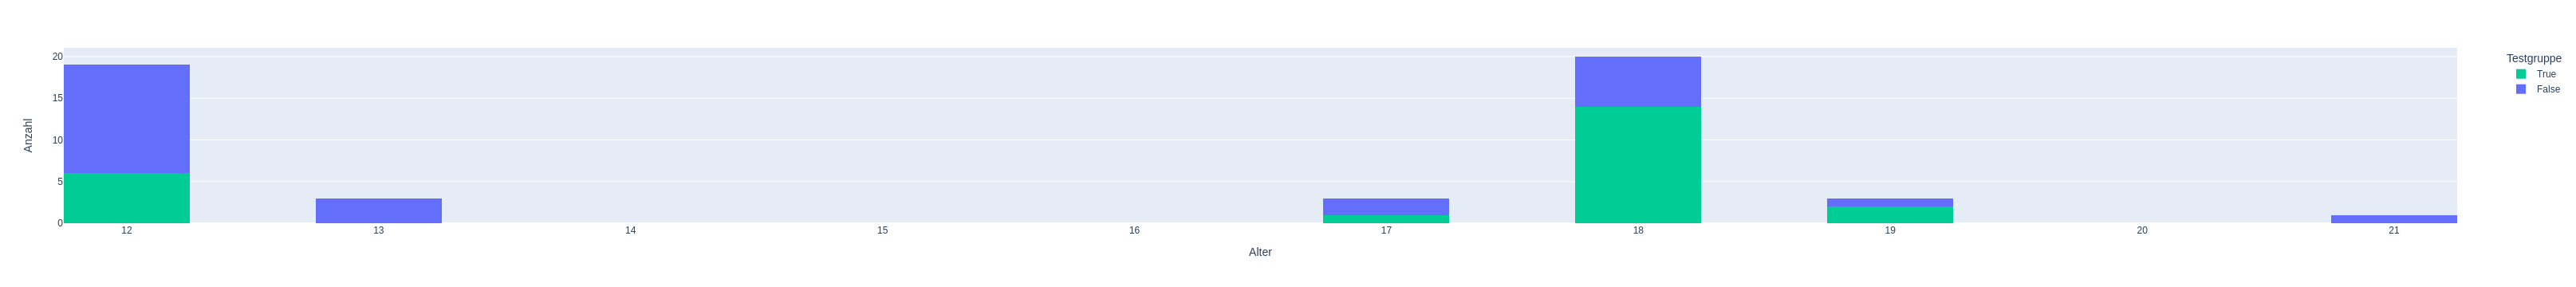

In [100]:
fig = px.histogram(df, x="persoenlich_alter", color="test", nbins=20, color_discrete_map=test_color_map)
fig.update_xaxes(title_text="Alter")
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(legend_title="Testgruppe")
fig.show()

# Tracking-Daten

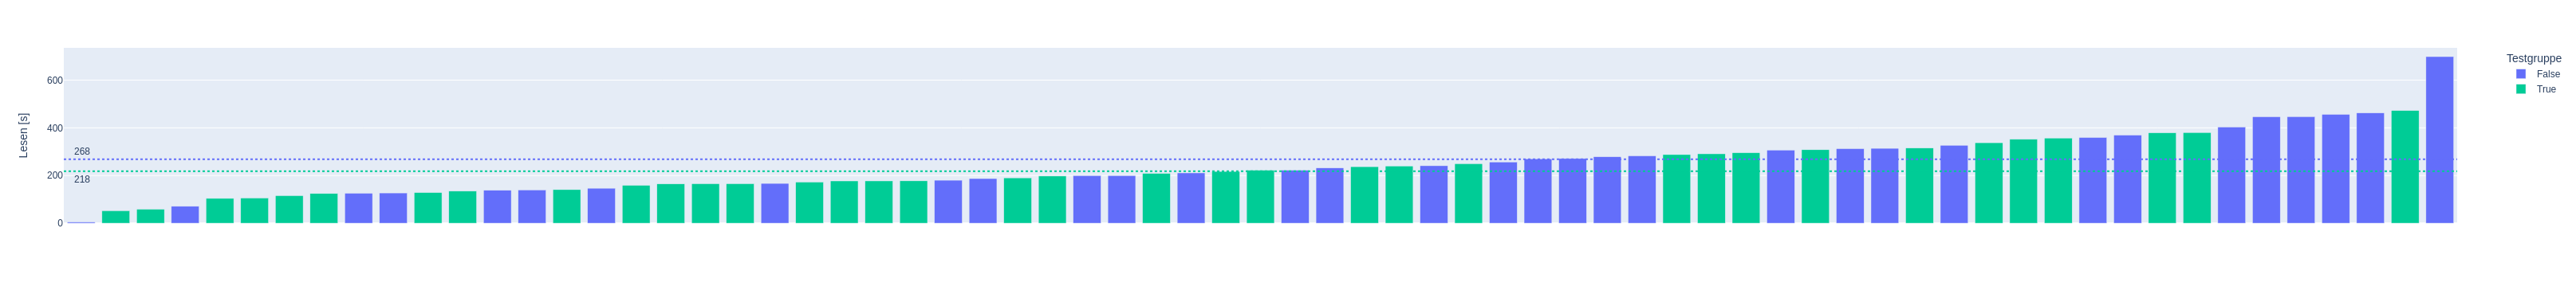

In [101]:
# Säulendiagramm
fig = px.bar(df.sort_values(by=["reading_duration"]), x="id", y="reading_duration", color="test", color_discrete_map=test_color_map)
fig.update_xaxes(showticklabels=False, title_text="")
fig.update_yaxes(title_text="Lesen [s]")
fig.update_coloraxes(colorbar_title="Testgruppe?")
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_title="Testgruppe")

# Liniendiagramme
average_reading_duration = df.groupby('test')['reading_duration'].mean()

fig.add_hline(y=average_reading_duration.loc[False], line_dash="dot", line_color=test_color_map[False], annotation_text=f"   {round(average_reading_duration.loc[False])}", annotation_position="left top")
fig.add_hline(y=average_reading_duration.loc[True], line_dash="dot", line_color=test_color_map[True], annotation_text=f"   {round(average_reading_duration.loc[True])}", annotation_position="left bottom")

fig.show()

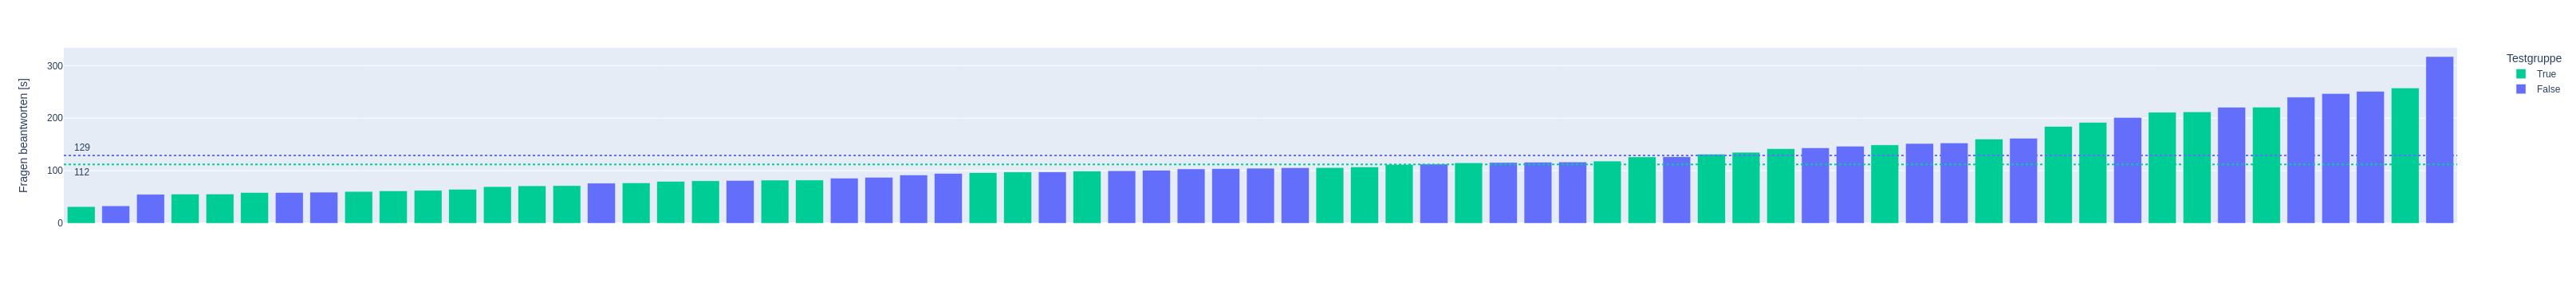

In [102]:
# Säulendiagramm
fig = px.bar(df.sort_values(by=["questions_duration"]), x="id", y="questions_duration", color="test", color_discrete_map=test_color_map)
fig.update_xaxes(showticklabels=False, title_text="")
fig.update_yaxes(title_text="Fragen beantworten [s]")
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_title="Testgruppe")

# Liniendiagramme
average_questions_duration = df.groupby('test')['questions_duration'].mean()

fig.add_hline(y=average_questions_duration.loc[False], line_dash="dot", line_color=test_color_map[False], annotation_text=f"   {round(average_questions_duration.loc[False])}", annotation_position="left top")
fig.add_hline(y=average_questions_duration.loc[True], line_dash="dot", line_color=test_color_map[True], annotation_text=f"   {round(average_questions_duration.loc[True])}", annotation_position="left bottom")

fig.show()

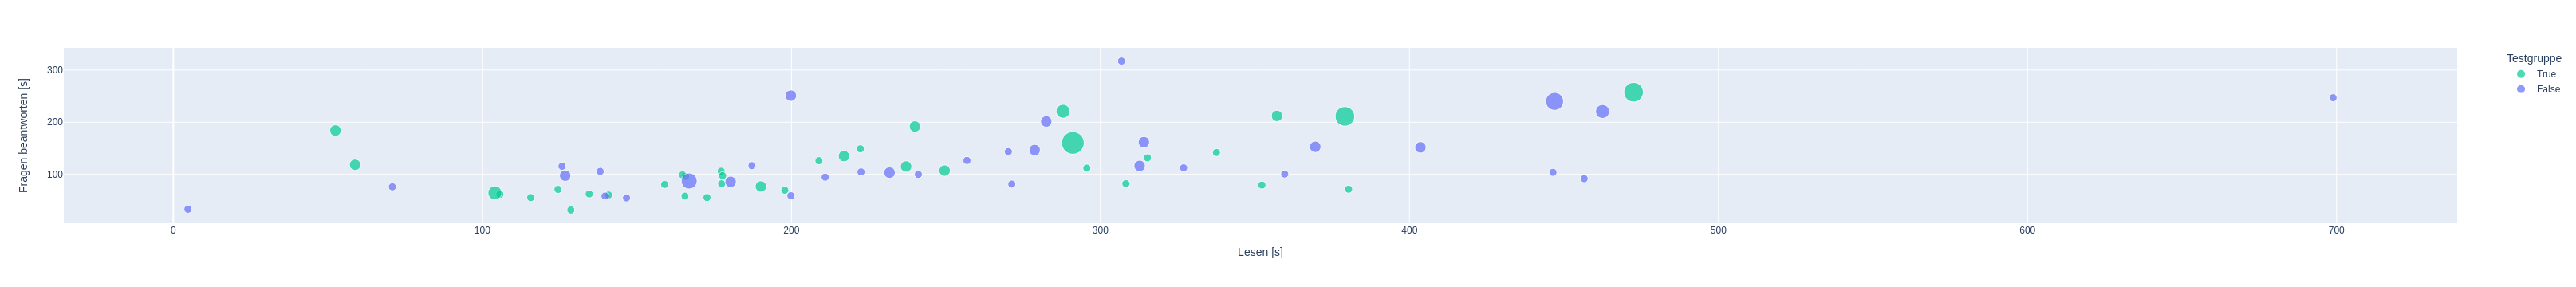

In [103]:
fig = px.scatter(df, x="reading_duration", y="questions_duration", color="test", size="reading_count", color_discrete_map=test_color_map)
fig.update_xaxes(title_text="Lesen [s]")
fig.update_yaxes(title_text="Fragen beantworten [s]")
fig.update_layout(legend_title="Testgruppe")
fig.show()

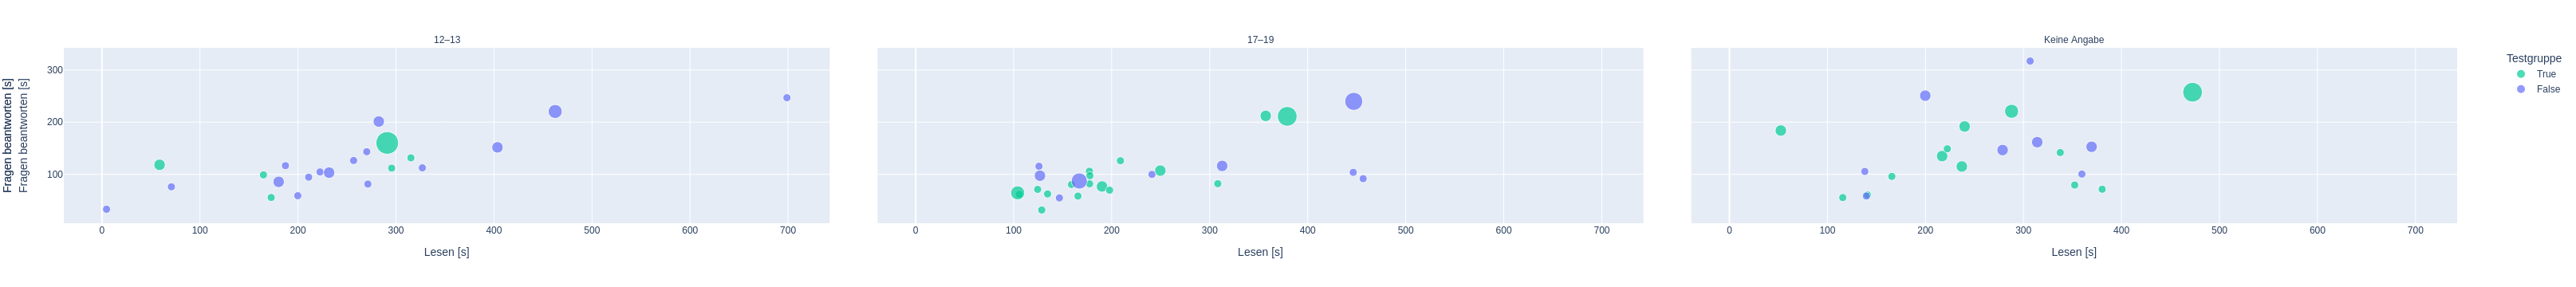

In [104]:
fig = px.scatter(df, x="reading_duration", y="questions_duration", color="test", size="reading_count", color_discrete_map=test_color_map,
                facet_col="altersgruppe", category_orders={"altersgruppe": agegroup_array})
# fig = px.scatter(df.dropna(subset="persoenlich_alter"), x="reading_duration", y="questions_duration", color="test", size="reading_count", color_discrete_map=test_color_map,
#                 facet_col="persoenlich_alter", category_orders={"persoenlich_alter": age_array})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Lesen [s]")
fig.update_yaxes(title_text="Fragen beantworten [s]")
fig.update_layout(legend_title="Testgruppe")
fig.show()

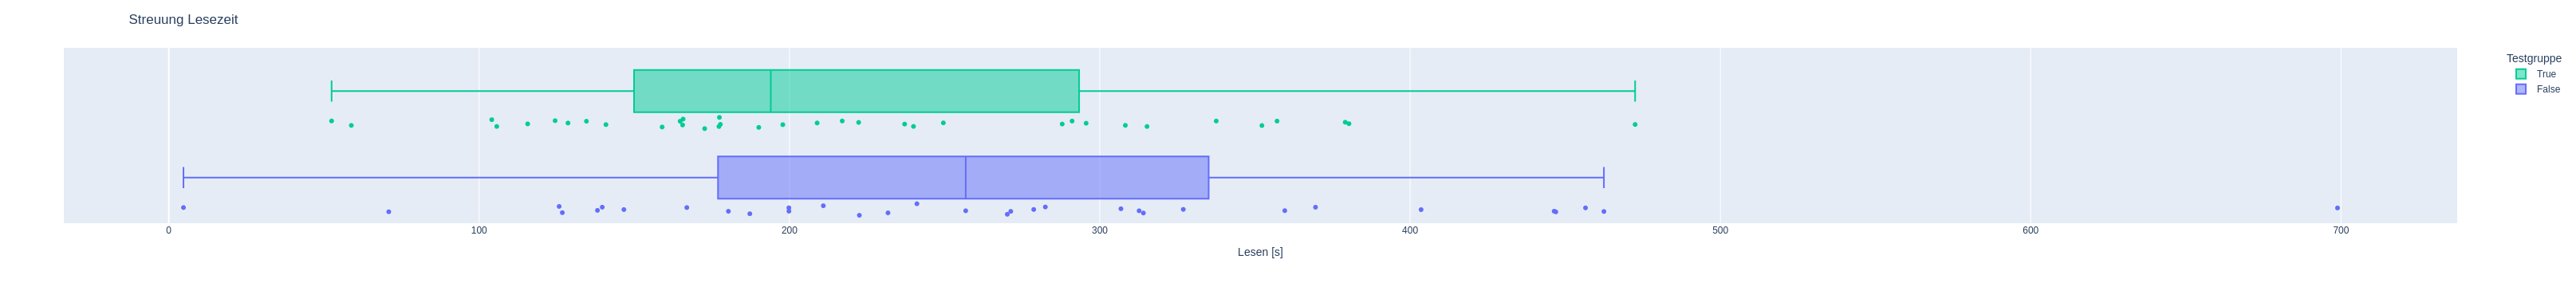

In [105]:
fig = px.box(df, x="reading_duration", points="all",
             y="test", color="test", color_discrete_map=test_color_map)
fig.update_xaxes(title_text="Lesen [s]")
fig.update_yaxes(title_text="", showticklabels=False)
fig.update_layout(legend_title="Testgruppe", title_text="Streuung Lesezeit")
fig.show()

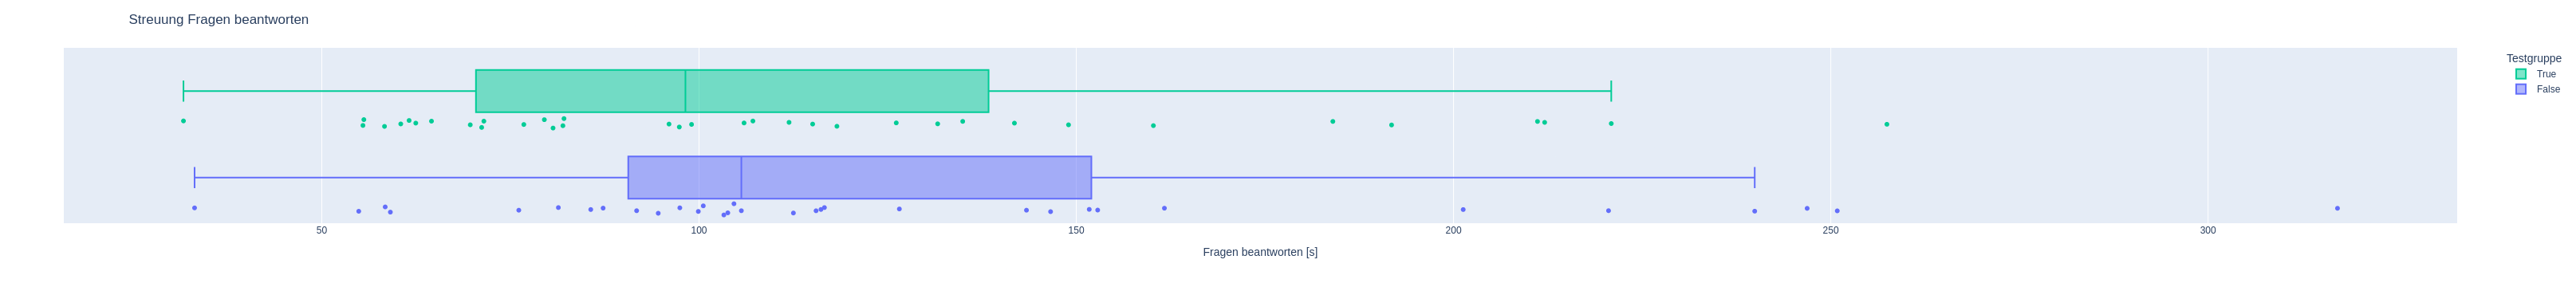

In [106]:
fig = px.box(df, x="questions_duration", points="all",
             y="test", color="test", color_discrete_map=test_color_map)
fig.update_xaxes(title_text="Fragen beantworten [s]")
fig.update_yaxes(title_text="", showticklabels=False)
fig.update_layout(legend_title="Testgruppe", title_text="Streuung Fragen beantworten")
fig.show()

# Antworten

In [107]:
answers = [1, 0, 2, 1, 0]

In [108]:
question_cols = df.columns[3:8]

In [109]:
def count_correct_answers(row):
    count = 0
    for i, col in enumerate(question_cols):
        if row[col] == answers[i]:
            count += 1
    return count

In [110]:
df["correct_answers"] = df.apply(count_correct_answers, axis=1)

In [111]:
rows = []
for i, col in enumerate(question_cols):
    question = " ".join(col.split('_')[1:])
    correct = (df[col] == answers[i]).sum()
    wrong = (df[col] != answers[i]).sum()

    rows.append([question, correct, wrong])

questions_df = pd.DataFrame(rows, columns=['Frage', 'Richtig', 'Falsch'])
questions_df

,Frage,Richtig,Falsch
0,gefuehle beruf,58,11
1,warum lehrer,59,10
2,oeffentlichkeit meinung,26,43
3,vorwurf eltern,42,27
4,internet,45,24


## Zeit

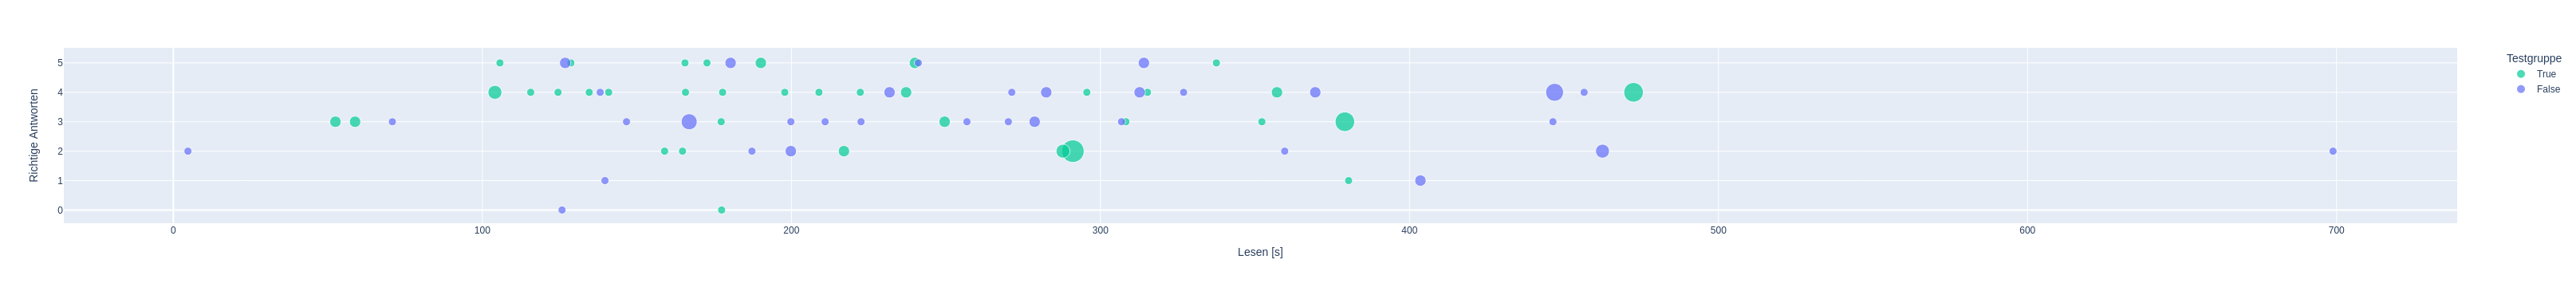

In [112]:
fig = px.scatter(df, x="reading_duration", y="correct_answers", size="reading_count", color="test", color_discrete_map=test_color_map)
fig.update_xaxes(title_text="Lesen [s]")
fig.update_yaxes(title_text="Richtige Antworten")
fig.update_layout(legend_title="Testgruppe")
fig.show()

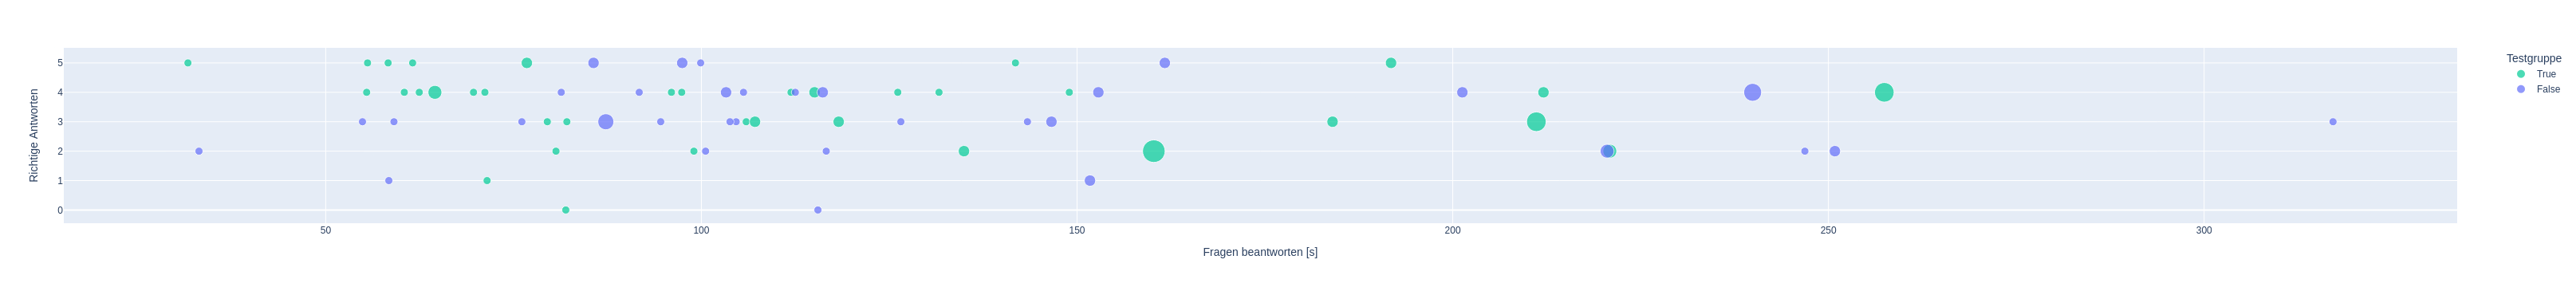

In [113]:
fig = px.scatter(df, x="questions_duration", y="correct_answers", size="reading_count", color="test", color_discrete_map=test_color_map)
fig.update_xaxes(title_text="Fragen beantworten [s]")
fig.update_yaxes(title_text="Richtige Antworten")
fig.update_layout(legend_title="Testgruppe")
fig.show()

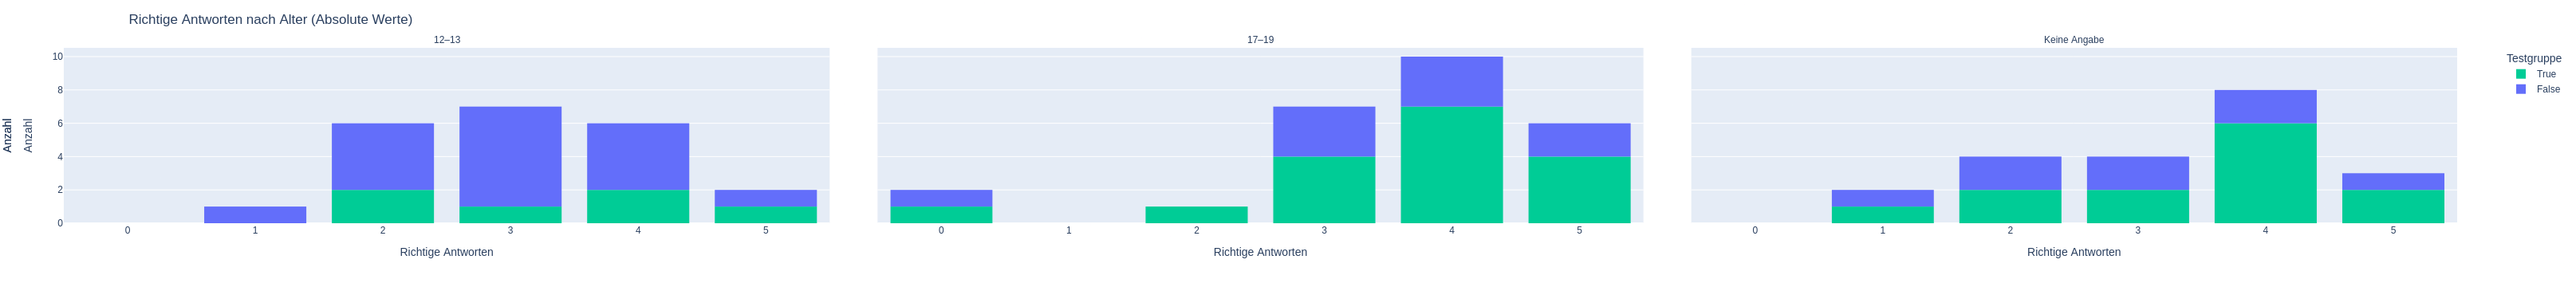

In [114]:
fig = px.histogram(df, x="correct_answers", color="test", color_discrete_map=test_color_map,
                  facet_col="altersgruppe", category_orders={"altersgruppe": agegroup_array, "correct_answers": list(range(0,6))})
# fig = px.histogram(df.dropna(subset="persoenlich_alter"), x="correct_answers", color="test", color_discrete_map=test_color_map,
#                   facet_col="persoenlich_alter", category_orders={"persoenlich_alter": age_array, "correct_answers": list(range(0,6))})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Richtige Antworten", type="category", categoryarray=list(range(0,6)))
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="Richtige Antworten nach Alter (Absolute Werte)", legend_title="Testgruppe")

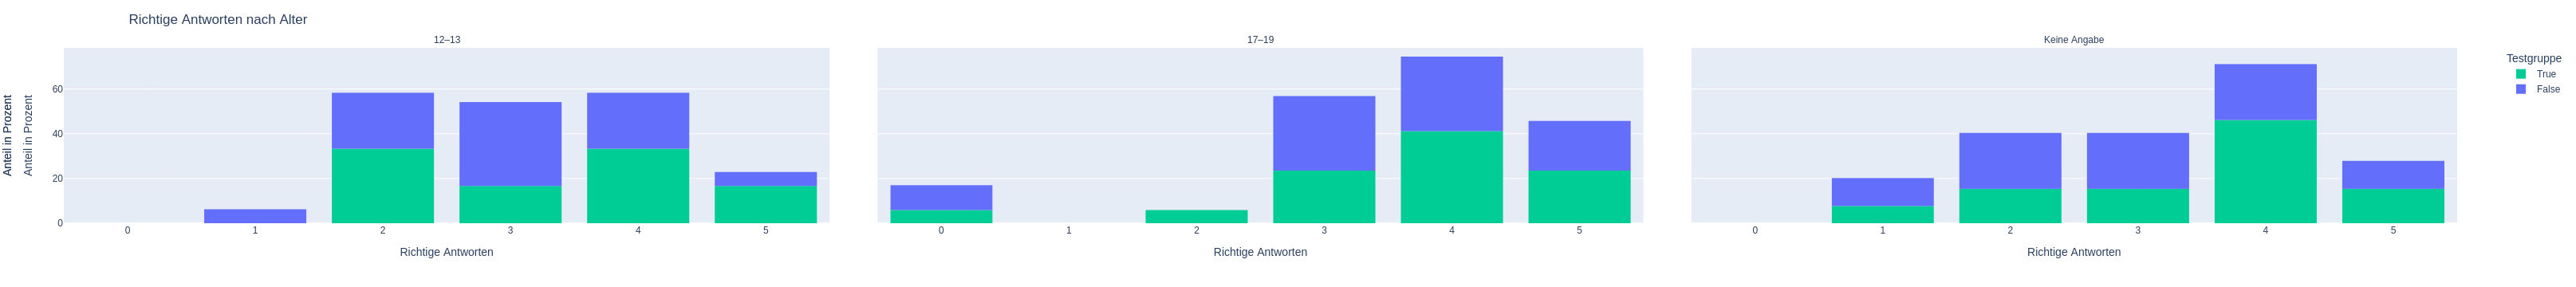

In [115]:
fig = px.histogram(df, x="correct_answers", color="test", color_discrete_map=test_color_map, histnorm="percent",
                  facet_col="altersgruppe", category_orders={"altersgruppe": agegroup_array, "correct_answers": list(range(0,6))})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Richtige Antworten", type="category", categoryarray=list(range(0,6)))
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Richtige Antworten nach Alter", legend_title="Testgruppe")

# Testgruppe

## Selbsteinschätzung

In [116]:
df_bionic = df[df["test"]]
df_bionic

,id,fingerprint,test,fragen_gefuehle_beruf,fragen_warum_lehrer,fragen_oeffentlichkeit_meinung,fragen_vorwurf_eltern,fragen_internet,bionic_schneller,bionic_leichter,...,persoenlich_freude_lesen,persoenlich_haeufigkeit_lesen,persoenlich_ziel_lesen,persoenlich_textverstaendnis,persoenlich_alter,reading_count,reading_duration,questions_duration,altersgruppe,correct_answers
0,3cc07733-3742-4090-994a-a5871016ebcc,d416268a243114c1742cc14e71814ade,True,1.0,0.0,2.0,1.0,0.0,Schneller,Leichter,...,Nicht sehr gerne,Nicht sehr oft,Nein,Eher schwer,18.0,1,128.633,31.664,17–19,5
2,e43c464c-543d-4a31-bbc7-ddc59c97f4d6,f5129980f00eff8b06c6d9dc53152514,True,1.0,2.0,0.0,1.0,0.0,Schneller,Kein Unterschied,...,Neutral,Nicht oft,Ich will mehr lesen,Ok,18.0,1,177.276,105.965,17–19,3
3,731e6143-04f3-4fff-a904-b86052d8686d,c1ed69d201693ed73e4c6c85f52e6a5c,True,2.0,0.0,0.0,1.0,0.0,Deutlich langsamer,Deutlich schwerer,...,Gerne,Nicht oft,Ich will mehr lesen,Eher schwer,18.0,2,249.590,107.136,17–19,3
5,1c20b10b-7b40-4f72-ad62-d0f82dffe16c,3f9e59cdd2fbc071de73b4cf87d21eb8,True,1.0,0.0,2.0,1.0,0.0,Kein Unterschied,Kein Unterschied,...,Nicht sehr gerne,Nicht sehr oft,Nein,Eher leicht,18.0,2,190.115,76.773,17–19,5
6,9060e823-c05e-41ae-9c36-10c77e389be7,5eeefb9a8a6e1cc2490146ff16de1554,True,2.0,0.0,0.0,3.0,0.0,Kein Unterschied,Schwerer,...,Sehr gerne,Sehr oft,Nein,Leicht,18.0,1,158.973,80.649,17–19,2
7,6f44d6e8-3d8c-46fe-9ae3-db136e738aa5,3cfda0b0235d557b05b61b4a0fe4ca11,True,1.0,0.0,2.0,1.0,3.0,Langsamer,Schwerer,...,Sehr gerne,Oft,Ich will mehr lesen,Leicht,18.0,1,208.914,126.138,17–19,4
8,3651a083-9dcc-49c2-83cf-81acf3b1f341,f79b85c7a0210d2d1efc4221c5e5c838,True,1.0,0.0,0.0,3.0,0.0,Schneller,Kein Unterschied,...,Gerne,Gelegentlich,Ich will mehr lesen,Leicht,18.0,1,308.237,82.100,17–19,3
9,73d5094f-108e-42db-a59d-5c0680877022,75a10532feed40e3a1aa444248adaa51,True,1.0,0.0,0.0,1.0,0.0,Schneller,Kein Unterschied,...,Sehr gerne,Oft,Ich will mehr lesen,Eher leicht,18.0,2,357.128,212.076,17–19,4
10,1659469c-274e-42dc-84ed-3fb106cf13f7,d5229fdaad2081e2fdfd56c833f6e8e7,True,1.0,0.0,3.0,1.0,0.0,Schneller,Leichter,...,Nicht sehr gerne,Nicht oft,Nein,Leicht,18.0,1,134.573,62.454,17–19,4
11,db23556e-094d-49ac-89cf-bd4ddc1aebf9,a3703fa3f5d0f37e75ecf2123b5e2b72,True,1.0,0.0,2.0,1.0,3.0,Deutlich schneller,Kein Unterschied,...,Sehr gerne,Oft,Ich will mehr lesen,Ok,18.0,1,124.483,71.188,17–19,4


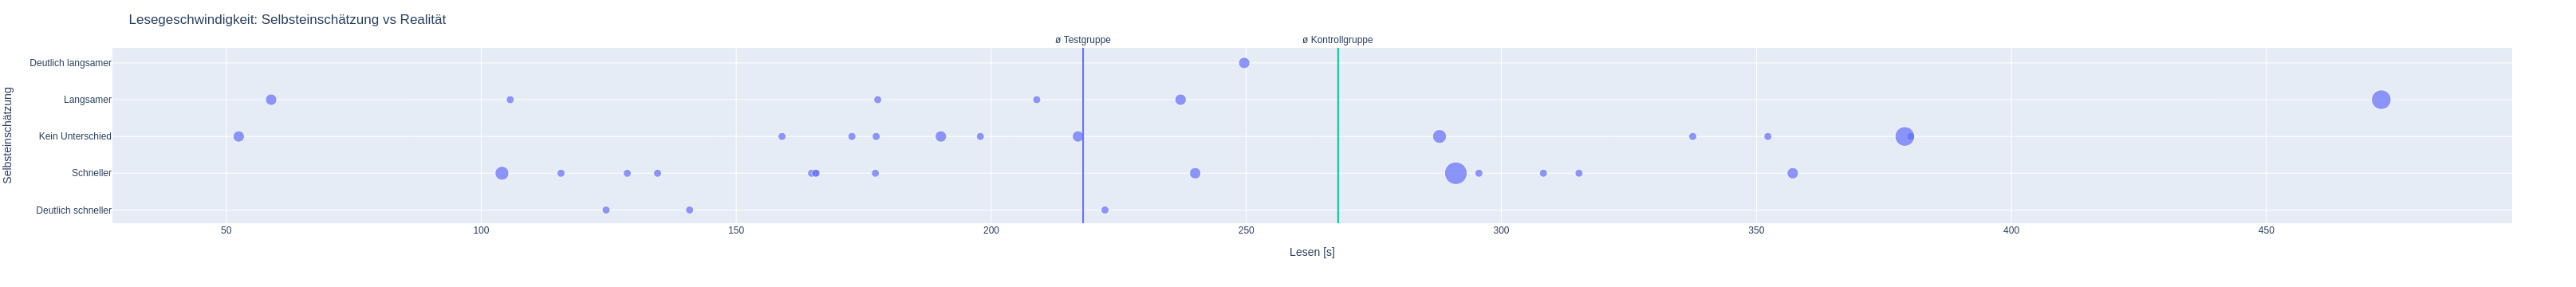

In [117]:
fig = px.scatter(df_bionic, x="reading_duration", y="bionic_schneller", size="reading_count")
fig.update_xaxes(title_text="Lesen [s]")
fig.update_yaxes(title_text="Selbsteinschätzung", categoryarray=bionic_schneller_labels)
fig.update_layout(title_text="Lesegeschwindigkeit: Selbsteinschätzung vs Realität")

# Durchschnitt
fig.add_vline(x=round(average_reading_duration.loc[True]), line_color=test_color_map[False], annotation_text="ø Testgruppe", annotation_position="top")
fig.add_vline(x=round(average_reading_duration.loc[False]), line_color=test_color_map[True], annotation_text="ø Kontrollgruppe", annotation_position="top")

fig.show()

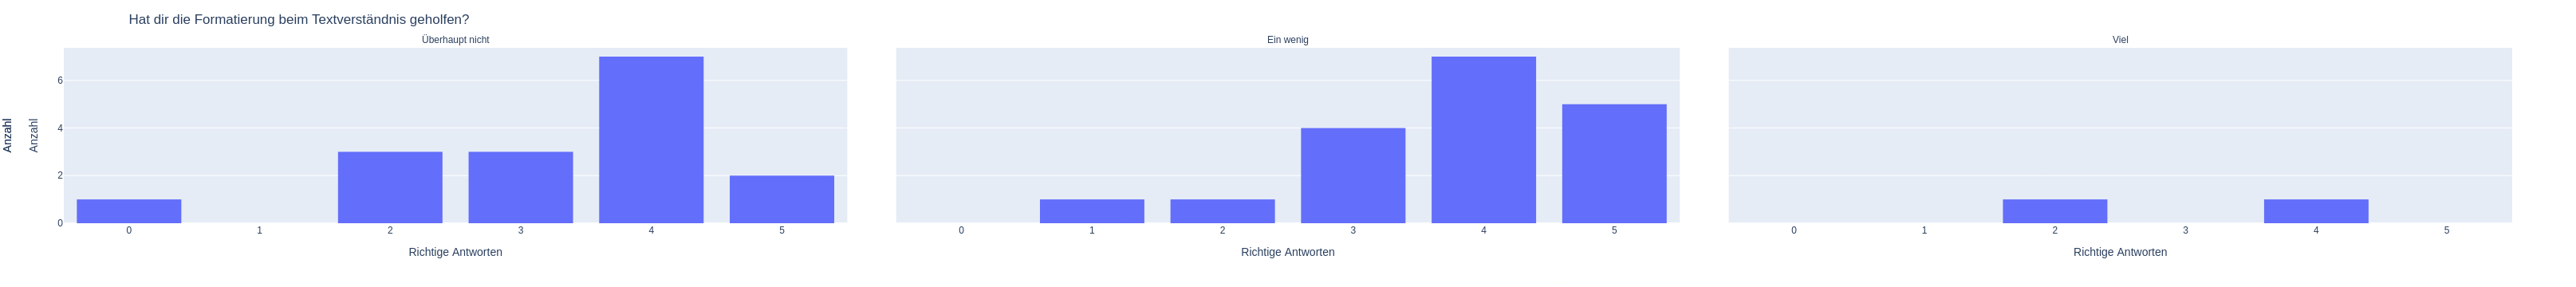

In [118]:
fig = px.histogram(df_bionic, x="correct_answers", facet_col="bionic_textverstaendnis")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(title_text="Richtige Antworten", type="category", categoryarray=list(range(0,6)))
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="Hat dir die Formatierung beim Textverständnis geholfen?")

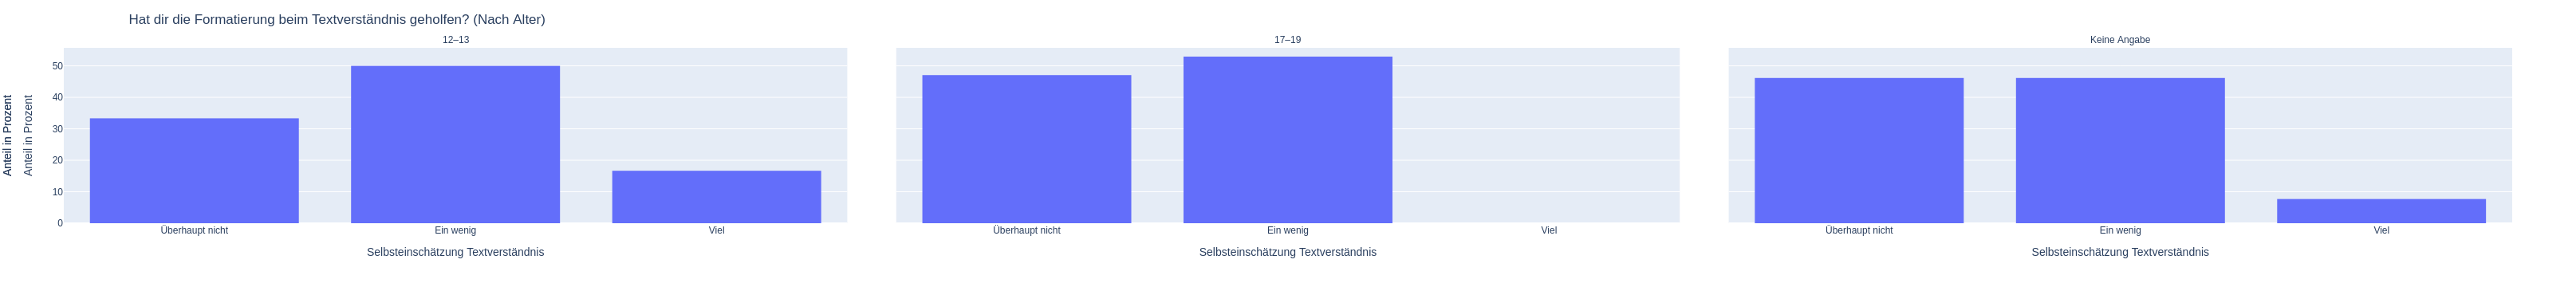

In [119]:
fig = px.histogram(df_bionic, x="bionic_textverstaendnis", facet_col="altersgruppe",
                   histnorm="percent", category_orders={"altersgruppe": agegroup_array})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Selbsteinschätzung Textverständnis", categoryarray=bionic_textverstaendnis_labels)
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Hat dir die Formatierung beim Textverständnis geholfen? (Nach Alter)")

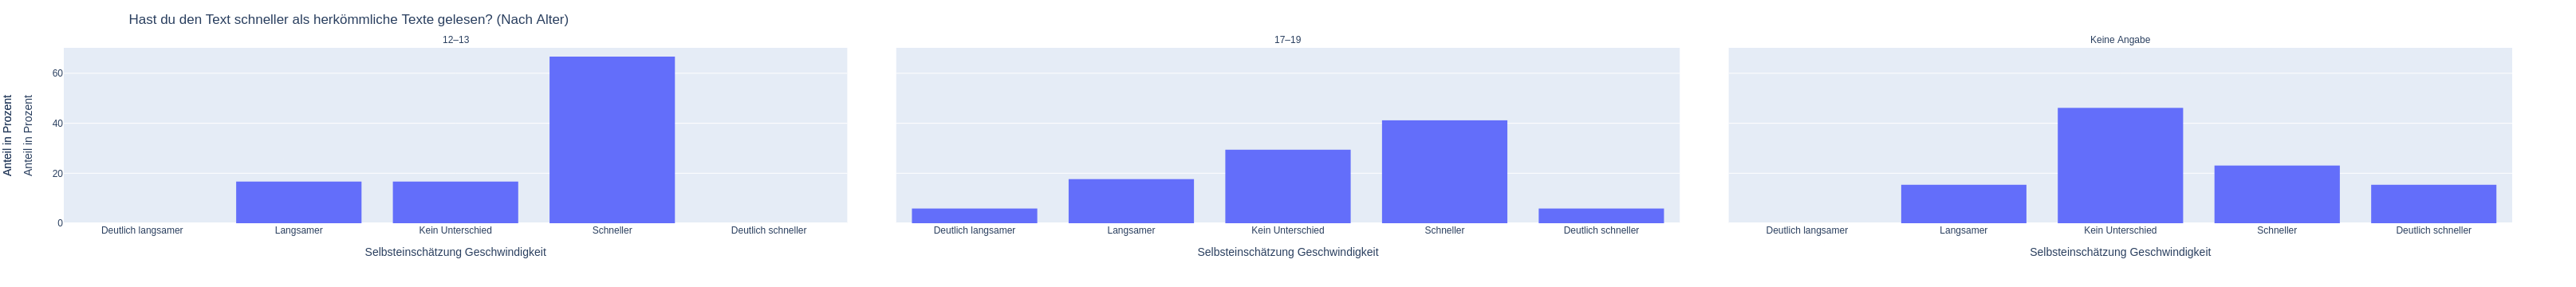

In [120]:
fig = px.histogram(df_bionic, x="bionic_schneller", facet_col="altersgruppe",
                   histnorm="percent", category_orders={"altersgruppe": agegroup_array})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Selbsteinschätzung Geschwindigkeit", categoryarray=bionic_schneller_labels[::-1])
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="Hast du den Text schneller als herkömmliche Texte gelesen? (Nach Alter)")

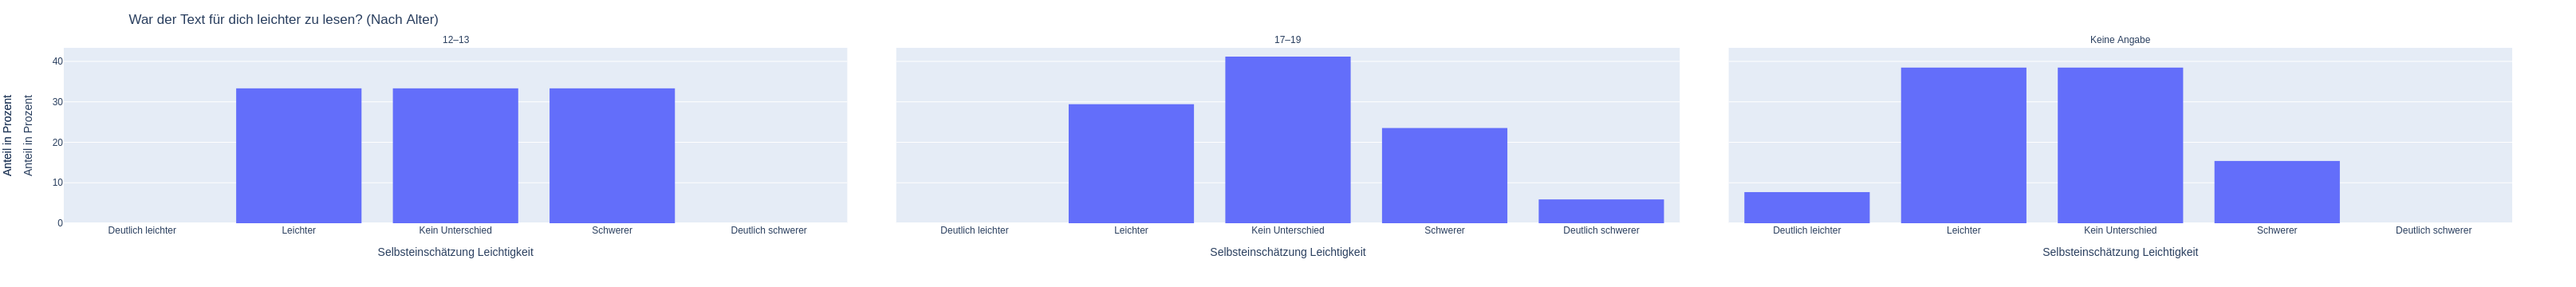

In [121]:
fig = px.histogram(df_bionic, x="bionic_leichter", facet_col="altersgruppe",
                   histnorm="percent", category_orders={"altersgruppe": agegroup_array})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Selbsteinschätzung Leichtigkeit", categoryarray=bionic_leichter_labels)
fig.update_yaxes(title_text="Anteil in Prozent")
fig.update_layout(title_text="War der Text für dich leichter zu lesen? (Nach Alter)")

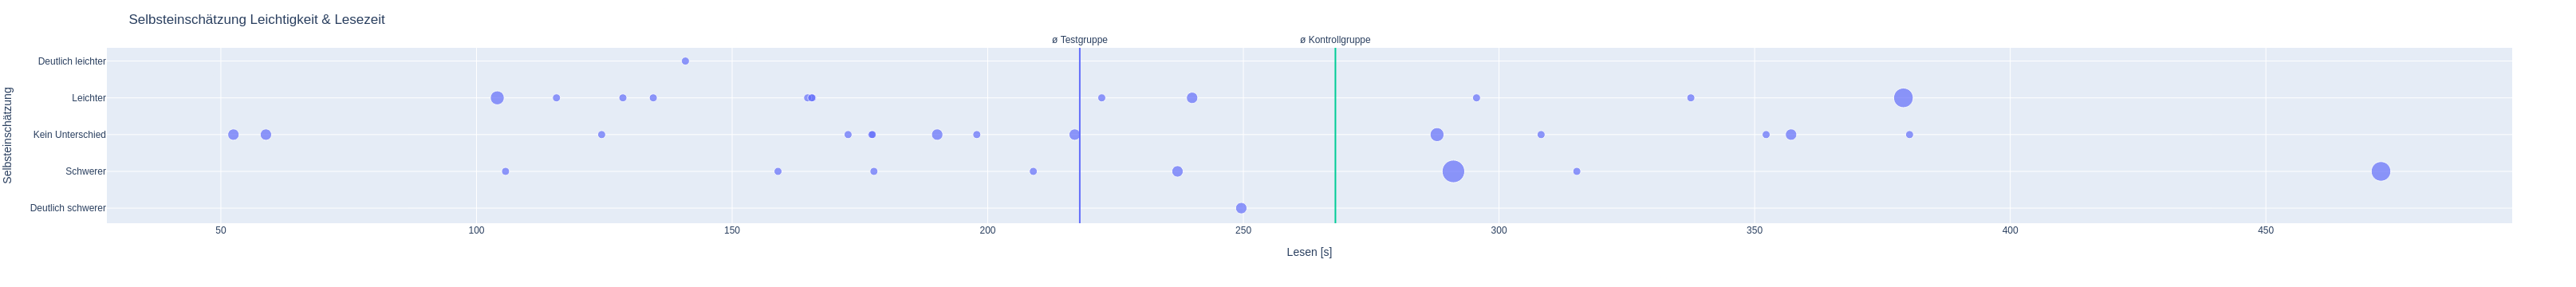

In [122]:
fig = px.scatter(df_bionic, y="bionic_leichter", x="reading_duration", size="reading_count")
fig.update_yaxes(title_text="Selbsteinschätzung", categoryarray=bionic_leichter_labels[::-1])
fig.update_xaxes(title_text="Lesen [s]")
fig.update_layout(title_text="Selbsteinschätzung Leichtigkeit & Lesezeit")

# Durchschnitt
fig.add_vline(x=round(average_reading_duration.loc[True]), line_color=test_color_map[False], annotation_text="ø Testgruppe", annotation_position="top")
fig.add_vline(x=round(average_reading_duration.loc[False]), line_color=test_color_map[True], annotation_text="ø Kontrollgruppe", annotation_position="top")

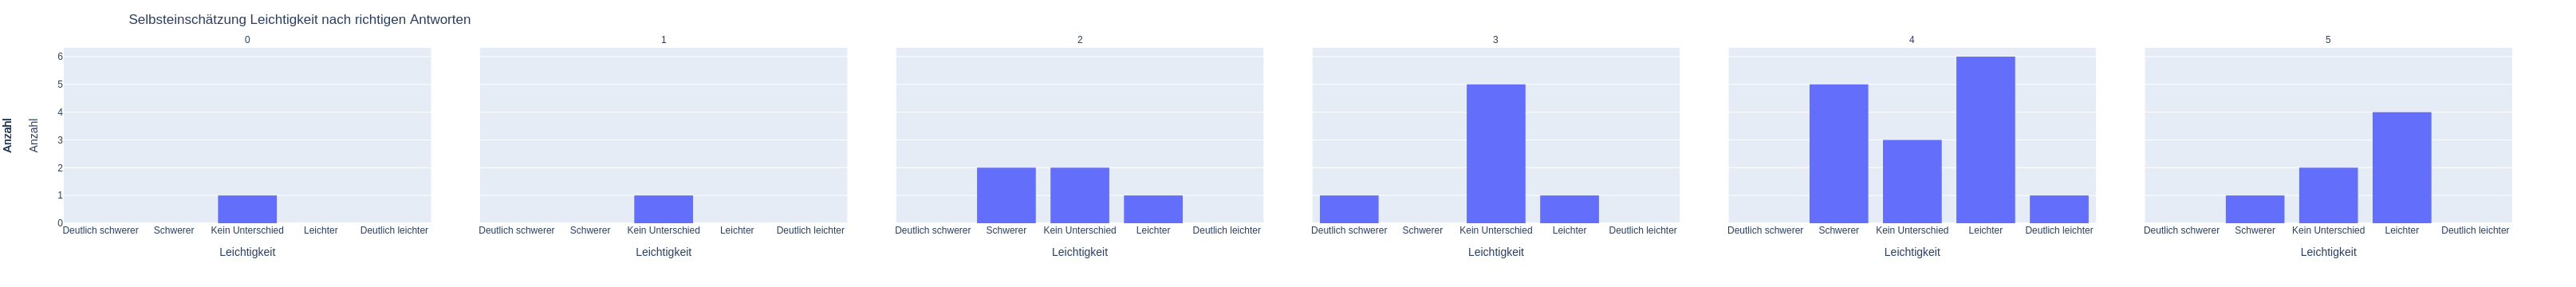

In [123]:
fig = px.histogram(df_bionic, x="bionic_leichter", facet_col="correct_answers", #facet_col_wrap=3,
                   category_orders={"bionic_leichter": bionic_leichter_labels[::-1], "correct_answers": list(range(0,6))})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1].split(".")[0]))
fig.update_xaxes(title_text="Leichtigkeit")
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="Selbsteinschätzung Leichtigkeit nach richtigen Antworten")

## Bionic Fragebogen

todo: balkendiagramme (histogramme)

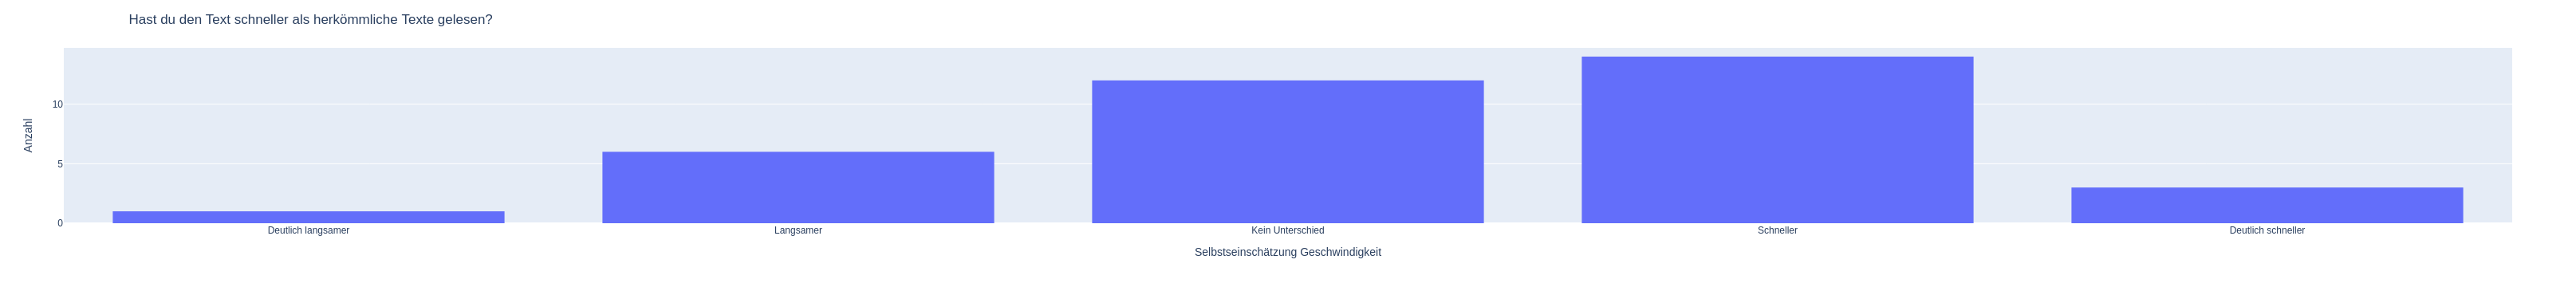

In [124]:
fig = px.histogram(df_bionic, x="bionic_schneller", category_orders={"bionic_schneller": bionic_schneller_labels[::-1]})
fig.update_xaxes(title_text="Selbstseinschätzung Geschwindigkeit")
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="Hast du den Text schneller als herkömmliche Texte gelesen?")

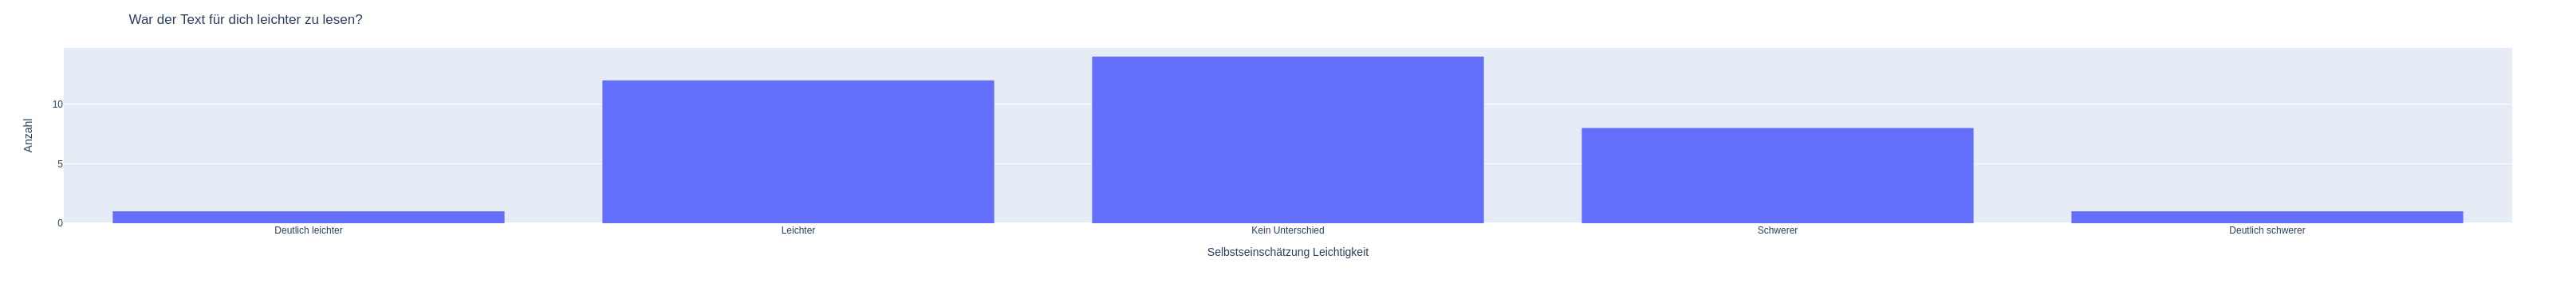

In [125]:
fig = px.histogram(df_bionic, x="bionic_leichter", category_orders={"bionic_leichter": bionic_leichter_labels})
fig.update_xaxes(title_text="Selbstseinschätzung Leichtigkeit")
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="War der Text für dich leichter zu lesen?")

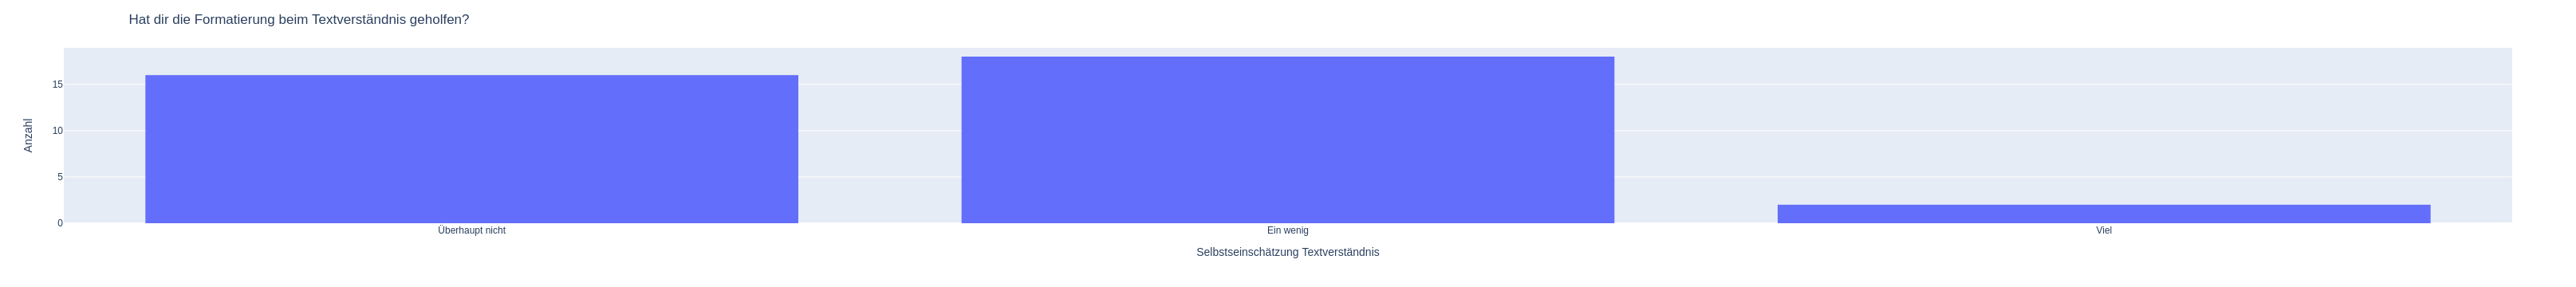

In [126]:
fig = px.histogram(df_bionic, x="bionic_textverstaendnis", category_orders={"bionic_textverstaendnis": bionic_textverstaendnis_labels})
fig.update_xaxes(title_text="Selbstseinschätzung Textverständnis")
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="Hat dir die Formatierung beim Textverständnis geholfen?")

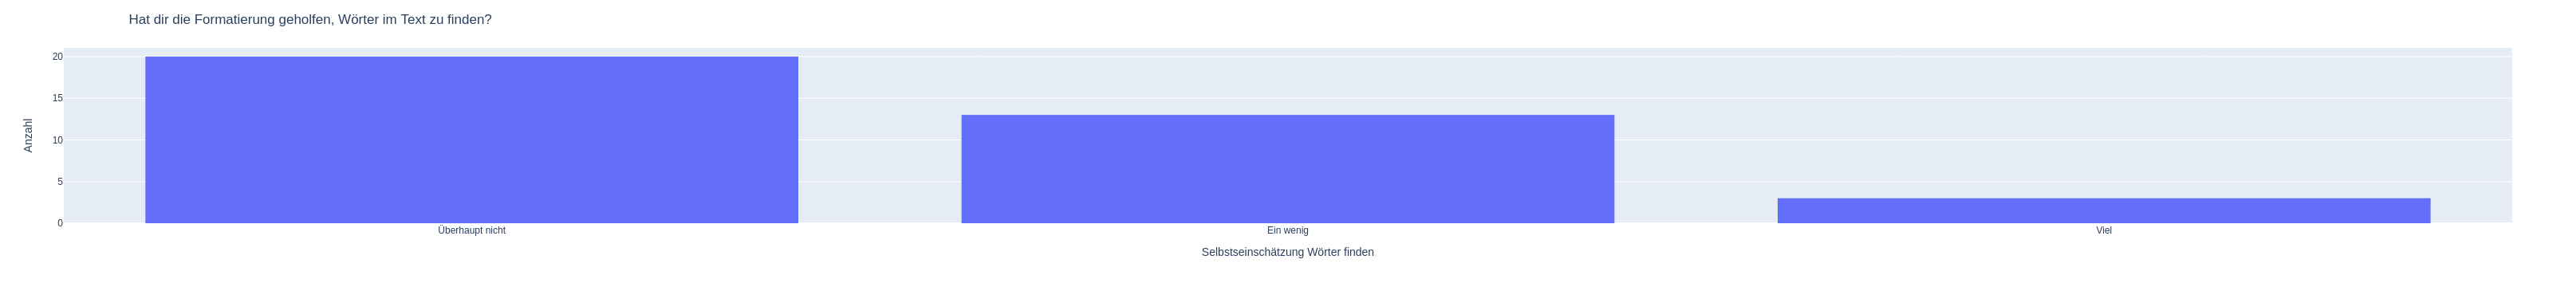

In [127]:
fig = px.histogram(df_bionic, x="bionic_woerter_finden", category_orders={"bionic_woerter_finden": bionic_woerter_finden_labels})
fig.update_xaxes(title_text="Selbstseinschätzung Wörter finden")
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="Hat dir die Formatierung geholfen, Wörter im Text zu finden?")

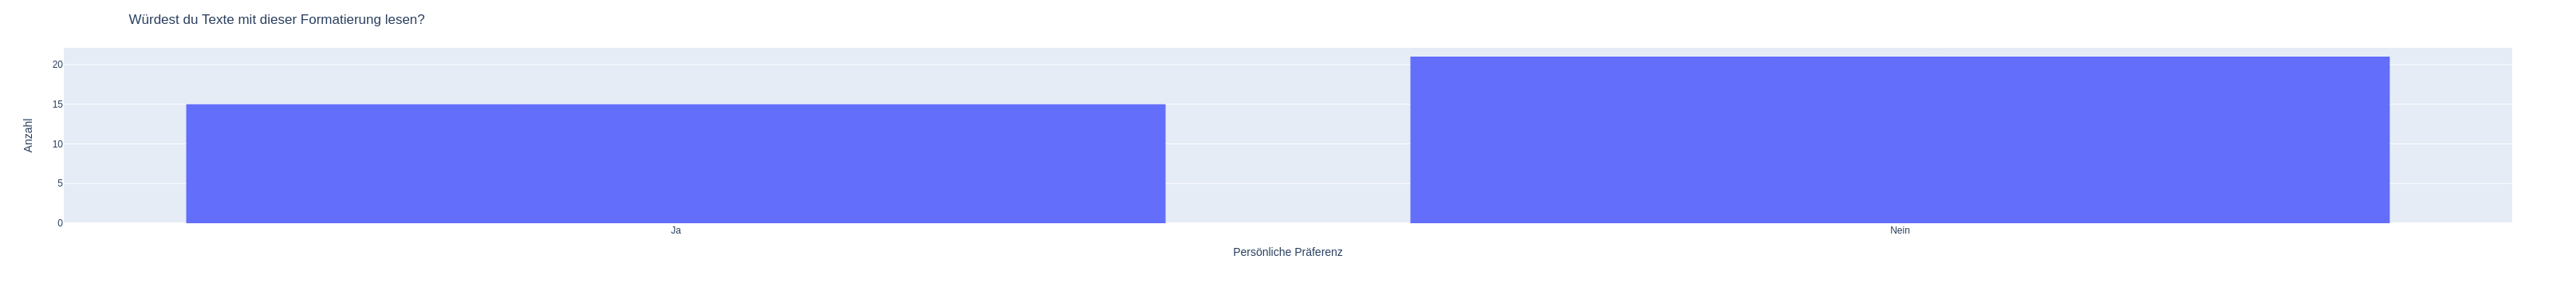

In [128]:
fig = px.histogram(df_bionic, x="bionic_mehr_texte", category_orders={"bionic_mehr_texte": bionic_mehr_texte_labels})
fig.update_xaxes(title_text="Persönliche Präferenz")
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="Würdest du Texte mit dieser Formatierung lesen?")

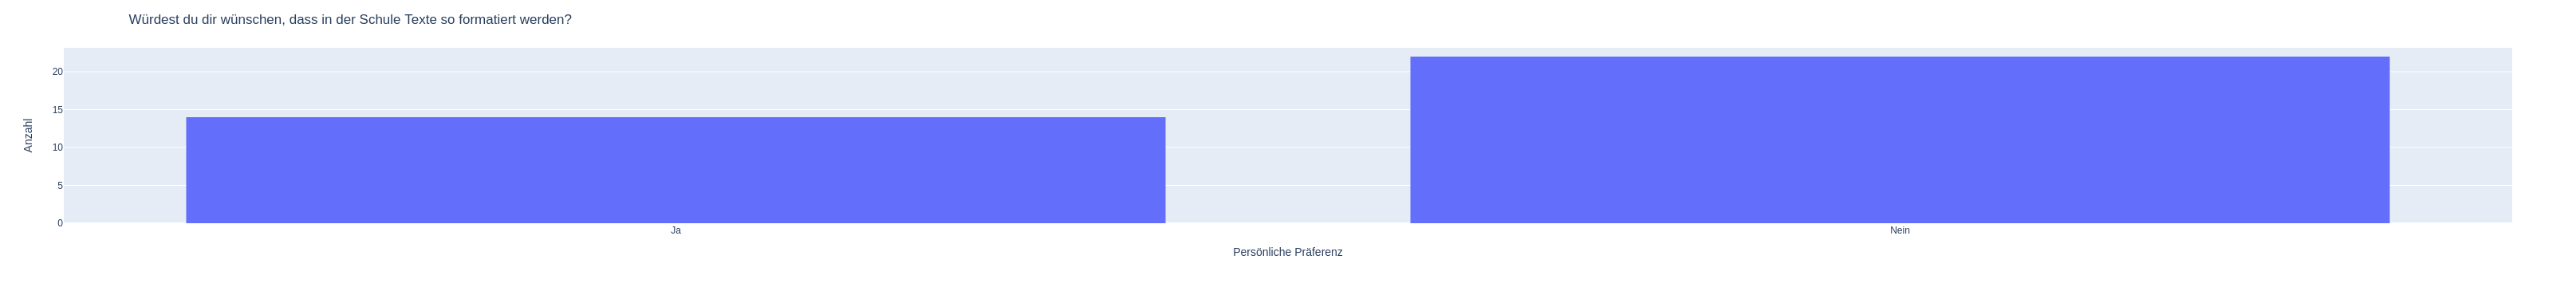

In [129]:
fig = px.histogram(df_bionic, x="bionic_in_schule", category_orders={"bionic_in_schule": bionic_in_schule_labels})
fig.update_xaxes(title_text="Persönliche Präferenz")
fig.update_yaxes(title_text="Anzahl")
fig.update_layout(title_text="Würdest du dir wünschen, dass in der Schule Texte so formatiert werden?")